In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config IPCompleter.greedy=True

In [5]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 
#load the dataset and split it into training and testing sets
dataset = load_breast_cancer()
X=dataset.data
Y=dataset.target
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 
# train the model on train set without using GridSearchCV 
model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# 1

In [26]:
import pandas as pd

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [3]:
dt

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# 2

Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

 

### Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

In [70]:
data = pd.read_csv(r'C:\Audiobooks\ForDS\train_data_tree.csv')

X = data[['sex', 'exang']]
y = data.num
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [71]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train = X, y

### Обучаем дерево

In [72]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [73]:
data.groupby('num').count()

,sex,exang
num,,
0,128,128
1,110,110


### Визуализация дерева

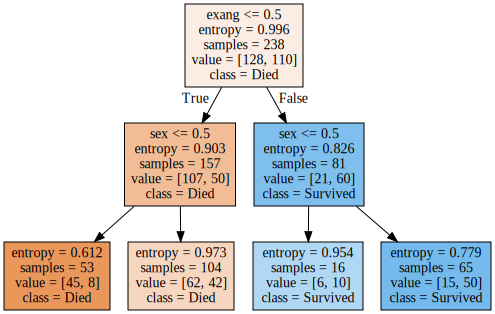

In [58]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [74]:
samples = clf.tree_.n_node_samples
samples

array([238, 157,  53, 104,  81,  16,  65], dtype=int64)

In [75]:
entropies = clf.tree_.impurity
entropies

array([0.99587   , 0.90271134, 0.61219613, 0.97315604, 0.82562653,
       0.954434  , 0.77934984])

In [76]:
weight_entropy = (entropies[1] * samples[1] - entropies[4] * samples[4]) / samples[0]
information_gain = entropies[0] - weight_entropy
information_gain
#weight_entropy

0.6813744842690801

In [77]:
weight_entropy = (0.903 * samples[1] - 0.826 * samples[4]) / samples[0]
information_gain = 0.996 - weight_entropy
information_gain
#weight_entropy

0.6814411764705881

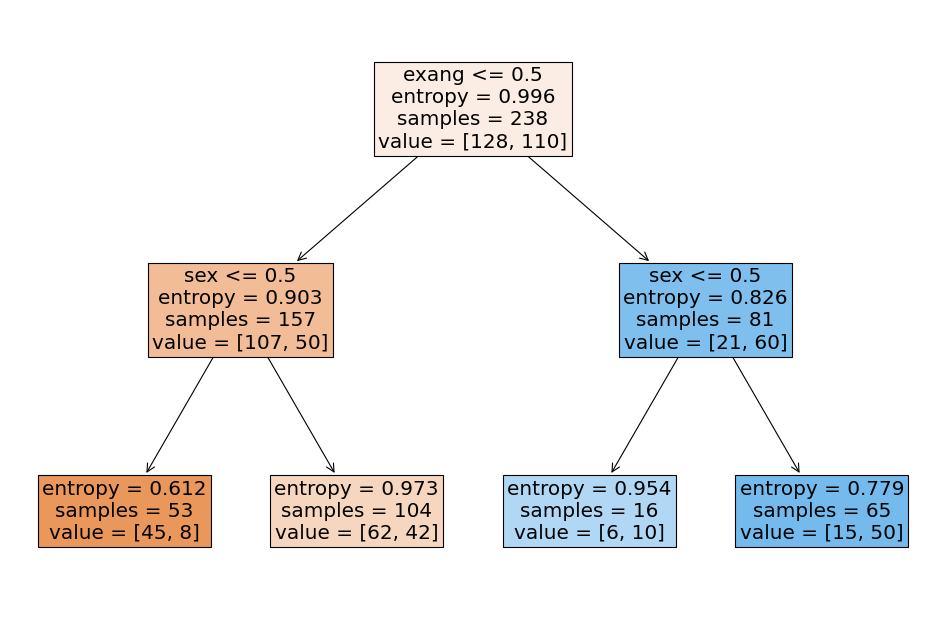

In [78]:
plt.figure(figsize=(15, 10),dpi=80)
p = tree.plot_tree(clf, fontsize=18,filled=True,feature_names=list(X))

# 3

Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [98]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
predicted = dt.predict(X_test)
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [100]:
import pandas as pd
from sklearn.metrics import confusion_matrix

predicted2 = dt.predict(X_train)
conf_matrix = confusion_matrix(y_train, predicted2)
conf_matrix

array([[35,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 38]], dtype=int64)

# 3b GridSearchCV

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:

    максимальная глубина - от 1 до 10 уровней
    минимальное число проб для разделения - от 2 до 10
    минимальное число проб в листе - от 1 до 10

и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [86]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, y_train = X, y

dt = DecisionTreeClassifier()
parameters = {'max_depth' : range(1, 11),
             'min_samples_split': range(2, 11),
             'min_samples_leaf' : range(1, 11)}

search = GridSearchCV(dt, parameters)

In [87]:
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [88]:
best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=3)

# 3c RandomizedSearchCV



Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

    максимальная глубина - от 1 до 10 уровней
    минимальное число проб для разделения - от 2 до 10
    минимальное число проб в листе - от 1 до 10

Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search


In [90]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X_train, y_train = X, y

dt = DecisionTreeClassifier()
parameters = {'max_depth' : range(1, 11),
             'min_samples_split': range(2, 11),
             'min_samples_leaf' : range(1, 11)}

search = RandomizedSearchCV(dt, parameters)

In [91]:
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [93]:
best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4)

# 4



Воспользуемся изученными приёмами и попредсказываем!

Даны 2 датасэта, к которым вы можете обращаться:

        train - размеченный с известными правильным ответами (хранятся в колонке y)
        test - набор, где нужно предсказать их

Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

    максимальная глубина - от 1 до 10 уровней
    минимальное число проб для разделения - от 2 до 10
    минимальное число проб в листе - от 1 до 10

Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions


In [94]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X_train = train.drop(['y'], axis=1)
y_train = train.y

dt = DecisionTreeClassifier()
parameters = {'max_depth' : range(1, 11),
             'min_samples_split': range(2, 11),
             'min_samples_leaf' : range(1, 11)}

search = GridSearchCV(dt, parameters)
search.fit(X_train, y_train)
best_tree = search.best_estimator_

predictions = best_tree.predict(test)

NameError: name 'train' is not defined

# 5

При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

##### В sklearn можно её удобно получить с помощью функции confusion_matrix. Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. Получите по ним confusion matrix и поместите её в переменную conf_matrix.

In [101]:
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, predictions)